In [1]:
import requests 
from bs4 import BeautifulSoup as soup
import pandas as pd


In [2]:
#requesting news response from bbc
bbc_news_url = "https://www.bbc.co.uk/news"
response = requests.get(bbc_news_url)
response.status_code

200

In [3]:
#Soup the response
bbc_soup = soup(response.content, 'lxml')

<!DOCTYPE html>
<html class="b-pw-1280 no-touch" id="responsive-news" lang="en-GB">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, user-scalable=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI" name="google-site-verification"/>
<link crossorigin="" href="//static.bbc.co.uk" rel="preconnect"/>
<link crossorigin="" href="//m.files.bbci.co.uk" rel="preconnect"/>
<link crossorigin="" href="//nav.files.bbci.co.uk" rel="preconnect"/>
<link crossorigin="" href="//ichef.bbci.co.uk" rel="preconnect"/>
<link href="//mybbc.files.bbci.co.uk" rel="dns-prefetch"/>
<link href="//ssl.bbc.co.uk/" rel="dns-prefetch"/>
<link href="//sa.bbc.co.uk/" rel="dns-prefetch"/>
<link href="//ichef.bbci.co.uk" rel="dns-prefetch"/>
<link as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styles/2.4.1/enhanced.css" rel="preload"/>
<script type="text/javascript">var domain 
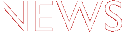

In [4]:
#more inspection done with chrome view source
bbc_soup

In [25]:
for tag in bbc_soup.find_all(True):
    print(tag.name)

html
head
meta
meta
meta
meta
link
link
link
link
link
link
link
link
link
script
title
meta
meta
link
link
link
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
meta
link
link
link
link
link
meta
meta
meta
meta
meta
meta
meta
script
script
script
script
link
meta
script
script
script
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
script
link
script
script
link
script
script
script
script
script
script
style
script
script
script
script
script
script
script
script
script
script
noscript
style
script
script
script
script
noscript
link
noscript
style
script
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
noscript
style
script
script
noscript
style
script
script
script
noscript
style
script
script
no

In [5]:
#every article is div with class attr = gs-c-promo-body gel-1/2@xs gel-1/1@m                top story   10 items
#                                       gs-c-promo-body gs-u-mt@m gel-1/2@xs gel-1/1@m      Brexit deal 4  items
#                                       gs-c-promo-body gel-1/2@xs gel-1/1@m gs-u-mt@m      full story 
#                                       
#                                    
#                                       
#                                       
article_div = bbc_soup.find_all( attrs={"class": "gs-c-promo-body gel-1/2@xs gel-1/1@m"})

In [6]:
article_div[0]

<div class="gs-c-promo-body gel-1/2@xs gel-1/1@m"><div><a class="gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-pica-bold nw-o-link-split__anchor" href="/news/uk-55447011"><h3 class="gs-c-promo-heading__title gel-pica-bold nw-o-link-split__text">'You are not alone' says Queen in Christmas speech</h3></a><p class="gs-c-promo-summary gel-long-primer gs-u-mt nw-c-promo-summary">She says that while all many people want is "a squeeze of the hand", there is "hope in the new dawn".</p></div><ul class="gs-o-list-inline gs-o-list-inline--divided gel-brevier gs-u-mt-"><li class="nw-c-promo-meta"><span class="gs-c-timestamp gs-o-bullet gs-o-bullet- nw-c-timestamp"><span class="gs-o-bullet__icon gel-icon"><svg viewbox="0 0 32 32"><polygon points="17,15.4 17,6 15,6 15,16.6 23.8,21.7 24.8,19.9"></polygon><path d="M16,4c6.6,0,12,5.4,12,12c0,6.6-5.4,12-12,12S4,22.6,4,16C4,9.4,9.4,4,16,4 M16,0C7.2,0,0,7.2,0,16c0,8.8,7.2,16,16,16 s16-7.2,16-16C32,7.2,24.8,0,16,0L16,0z"></path></svg></span><ti

In [7]:
title = article_div[0].find('h3').text

In [8]:
print(title)

'You are not alone' says Queen in Christmas speech


In [9]:
href = article_div[0].find('a', href=True)

In [10]:
url = href['href']
url

'/news/uk-55447011'

In [11]:
summary = article_div[0].find('p').text
summary

'She says that while all many people want is "a squeeze of the hand", there is "hope in the new dawn".'

In [12]:
date_time = article_div[0].find('time')['datetime']
date_time

'2020-12-25T15:50:19.000Z'

In [13]:
len(article_div)

10

In [14]:
head_line=[]
article_url=[]
article_summary=[]
article_date_time=[]

for article in article_div:
    try:
        title = article.find('h3').text
        print(title)
        head_line.append(title)
    except:
        print("exception while extracting head line")
    
    try:
        href = article.find('a', href=True)
        url = "https://www.bbc.com"+href['href']
        print(url)
        article_url.append(url)
    except:
        print("exception while extracting url")
        
    try:
        summary = article.find('p').text
        print(summary)
        article_summary.append(summary)
    except:
        print("exception while extracting summary")
        
    try:
        date_time = article_div[0].find('time')['datetime']
        print(date_time)
        article_date_time.append(date_time)
    except:
        print("exception while extracting date time")
            


'You are not alone' says Queen in Christmas speech
https://www.bbc.com/news/uk-55447011
She says that while all many people want is "a squeeze of the hand", there is "hope in the new dawn".
2020-12-25T15:50:19.000Z
UK minister sees 'special relationship' with EU
https://www.bbc.com/news/uk-politics-55451102
The cabinet secretary says he has lost friends over Brexit and admits it turned UK politics "ugly".
2020-12-25T15:50:19.000Z
UN peacekeepers killed in CAR on election eve
https://www.bbc.com/news/world-africa-55451763
The UN said three peacekeepers died in two separate attacks, as rebel and government forces clash.
2020-12-25T15:50:19.000Z
Australian saved in five-day Antarctica rescue
https://www.bbc.com/news/world-australia-55446454
Australia, China and the US work together to medically evacuate the expeditioner.
2020-12-25T15:50:19.000Z
Millions wake up to tighter Covid restrictions in UK
https://www.bbc.com/news/uk-55449596
More areas in England enter tier four, as lockdowns beg

In [15]:
data = {'head_line': head_line, 'url': article_url, 'summary':article_summary, 'date': article_date_time}
df = pd.DataFrame.from_dict(data)

In [16]:
df.head()

,head_line,url,summary,date
0,'You are not alone' says Queen in Christmas sp...,https://www.bbc.com/news/uk-55447011,"She says that while all many people want is ""a...",2020-12-25T15:50:19.000Z
1,UK minister sees 'special relationship' with EU,https://www.bbc.com/news/uk-politics-55451102,The cabinet secretary says he has lost friends...,2020-12-25T15:50:19.000Z
2,UN peacekeepers killed in CAR on election eve,https://www.bbc.com/news/world-africa-55451763,The UN said three peacekeepers died in two sep...,2020-12-25T15:50:19.000Z
3,Australian saved in five-day Antarctica rescue,https://www.bbc.com/news/world-australia-55446454,"Australia, China and the US work together to m...",2020-12-25T15:50:19.000Z
4,Millions wake up to tighter Covid restrictions...,https://www.bbc.com/news/uk-55449596,"More areas in England enter tier four, as lock...",2020-12-25T15:50:19.000Z


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   head_line  10 non-null     object
 1   url        10 non-null     object
 2   summary    10 non-null     object
 3   date       10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [18]:
response = requests.get(article_url[0])

In [19]:
response.status_code

200

In [20]:
article_soup = soup(response.content, 'lxml')

In [21]:
article_soup

<!DOCTYPE html>
<html class="no-js" lang="en-GB"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title data-rh="true">Queen's Christmas speech: 'You are not alone' - BBC News</title><meta content='She says that while all many people want is "a squeeze of the hand", there is "hope in the new dawn".' data-rh="true" name="description"/><meta content="#FFFFFF" data-rh="true" name="theme-color"/><meta content="https://www.facebook.com/bbcnews" data-rh="true" property="article:author"/><meta content="UK" data-rh="true" property="article:section"/><meta content="100004154058350" data-rh="true" property="fb:admins"/><meta content="1609039196070050" data-rh="true" property="fb:app_id"/><meta content="1143803202301544,317278538359186,1392506827668140,742734325867560,185246968166196,156060587793370,137920769558355,193435954068976,21263239760,156400551056385,929399697073756,154344434967,228735667216,80758950658,260212261199,294662213128,1086451581

In [22]:
a = article_soup.find_all(attrs={"data-component": "text-block"})
a

[<div class="css-uf6wea-RichTextComponentWrapper e1xue1i83" data-component="text-block"><style data-emotion-css="83cqas-RichTextContainer">.css-83cqas-RichTextContainer{color:#3F3F42;}.css-83cqas-RichTextContainer > *:not([hidden]):not(style) ~ *:not([hidden]):not(style){margin-top:1rem;}</style><div class="css-83cqas-RichTextContainer e5tfeyi2"><p><style data-emotion-css="14iz86j-BoldText">.css-14iz86j-BoldText{font-weight:bold;}</style><b class="css-14iz86j-BoldText e5tfeyi0">The Queen has used her Christmas Day message to reassure anyone struggling without friends and family this year that they "are not alone".</b></p></div></div>,
 <div class="css-uf6wea-RichTextComponentWrapper e1xue1i83" data-component="text-block"><div class="css-83cqas-RichTextContainer e5tfeyi2"><p>She said what many people want "for Christmas is a simple hug or a squeeze of the hand" - but "even on the darkest nights there is hope in the new dawn".</p></div></div>,
 <div class="css-uf6wea-RichTextComponentWra

In [23]:
a[0].find('p').text

'The Queen has used her Christmas Day message to reassure anyone struggling without friends and family this year that they "are not alone".'

In [24]:
def get_article(article_url):
    article_soup=[]
    for url in article_url:
        try:
            response = requests.get(url)
            article_soup.append(soup(response.content, 'lxml'))
        except:
            print("error fetching response")
        
    return(article_soup)



In [25]:
article_soup = get_article(article_url)

In [26]:
text_blocks = article_soup[0].find_all(attrs={"data-component": "text-block"})
text_blocks

[<div class="css-uf6wea-RichTextComponentWrapper e1xue1i83" data-component="text-block"><style data-emotion-css="83cqas-RichTextContainer">.css-83cqas-RichTextContainer{color:#3F3F42;}.css-83cqas-RichTextContainer > *:not([hidden]):not(style) ~ *:not([hidden]):not(style){margin-top:1rem;}</style><div class="css-83cqas-RichTextContainer e5tfeyi2"><p><style data-emotion-css="14iz86j-BoldText">.css-14iz86j-BoldText{font-weight:bold;}</style><b class="css-14iz86j-BoldText e5tfeyi0">The Queen has used her Christmas Day message to reassure anyone struggling without friends and family this year that they "are not alone".</b></p></div></div>,
 <div class="css-uf6wea-RichTextComponentWrapper e1xue1i83" data-component="text-block"><div class="css-83cqas-RichTextContainer e5tfeyi2"><p>She said what many people want "for Christmas is a simple hug or a squeeze of the hand" - but "even on the darkest nights there is hope in the new dawn".</p></div></div>,
 <div class="css-uf6wea-RichTextComponentWra

In [27]:
article_text=[]
text=""
for article in article_soup:
    try:
        text_blocks = article.find_all(attrs={"data-component": "text-block"})
    except:
        print("error finding blocks")
    for block in text_blocks:
        try:
            text += block.find('p').text+"\n"
        except:
            print("error extracting text")
        
    article_text.append(text)
    text = ""
    text_blocks=[]

In [28]:
article_text

['The Queen has used her Christmas Day message to reassure anyone struggling without friends and family this year that they "are not alone".\nShe said what many people want "for Christmas is a simple hug or a squeeze of the hand" - but "even on the darkest nights there is hope in the new dawn".\nThe 94-year-old praised acts of kindness, saying the pandemic "brought us closer" despite causing hardship.\nThe Queen, like so many, is spending the day apart from her family.\n"Remarkably, a year that has necessarily kept people apart has, in many ways, brought us closer," the monarch said in the broadcast, adding that the Royal Family has been "inspired" by people volunteering in their communities.\n"In the United Kingdom and around the world, people have risen magnificently to the challenges of the year, and I am so proud and moved by this quiet, indomitable spirit."\nShe lamented that "people of all faiths have been unable to gather as they would wish for their festivals", but said "we nee

In [30]:
df.head(1)

,head_line,url,summary,date
0,'You are not alone' says Queen in Christmas sp...,https://www.bbc.com/news/uk-55447011,"She says that while all many people want is ""a...",2020-12-25T15:50:19.000Z


In [31]:
df['text']=article_text

In [32]:
df.head(1)

,head_line,url,summary,date,text
0,'You are not alone' says Queen in Christmas sp...,https://www.bbc.com/news/uk-55447011,"She says that while all many people want is ""a...",2020-12-25T15:50:19.000Z,The Queen has used her Christmas Day message t...
